# 1. Information about the submission

## 1.1 Name and number of the assignment 

Text Detoxification

Homework 3

## 1.2 Student name

Waralak Pariwatphan

## 1.3 Codalab user ID

wkpn

## 1.4 Additional comments

Dear TAs,

In this colab file, I connected to the Google drive to save the files and there are train_models and train_results folders to make sure that if the runtime was crashed, all results could be saved. I've already edit the code that you can run all without connecting to drive but since this task requires a lot of RAM for training, I'm afraid that it might have the runtime or RAM crash. Could you please forgive me for that?

Thank you a lot! 😀

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology 

**Data preprocessing**

The patterns in the train and validation sets are similar. Each phrase has one toxic and 3 neutral comments. So, the train and validation sets have to be mapped to 1 toxic and 1 neutral comment, respectively, before shuffling the data.

**Methods**

***1. ruT5-base***

In order to investigate this task, I utilize the [Github](https://github.com/s-nlp/russe_detox_2022) baseline method. To start with, I perform the original training with the model from `SkolkovoInstitute/ruT5-base-detox` and the tokenizer from `sberbank-ai/ruT5-base`.

Since we have this baseline, I would like to investigate if the training steps can affect to the scores, including Style Transfer Accuracy score (STA), Meaning Preservation score (SIM), Fluency score (FL), and Joint score (J). I perform the test for the different steps: 100, 200 , 500, 700, 1000, 2000, 3000, 5000, and 7000 steps (I have to stop after 7000 steps since the GPU limit). 

***2. ruPromp***

I also utilize the [Github](https://github.com/s-nlp/russe_detox_2022) ruPromp method. Due to RAM constraints, I execute the initial training with the model and tokenizer from `sberbank-ai/rugpt3large_based_on_gpt2` with the maximum step size for training the model = 10000.


***3. delete***

I use the toxic words from [this file](https://github.com/s-nlp/russe_detox_2022/blob/main/baselines/delete/toxic_vocab_extended.txt) for this method, but not the `udpipe_syntagrus.model` because it can cause my GPU RAM to crash. As a result, in my process, any toxic words in sentences or phrases are deleted while all other words remain unchanged. 

***4. delete x ruT5***

For this method, I first remove all [toxic words](https://github.com/s-nlp/russe_detox_2022/blob/main/baselines/delete/toxic_vocab_extended.txt) while keeping all other terms. Then I use the ruT5 model to paraphrase the sentence since dropping some words causes those sentences to have a strange phrase structure.




## 2.2 Discussion of results

**Model results**

The results can be summarized in this table.

<br>

Method                              | STA  | SIM  | FL   | J
---                                 | ---  | ---  | ---  | ---
ruT5-base                           | 0.796 | 0.827 | 0.837 | **0.560**
ruT5-base with step training = 7000 | **0.795** | 0.813 | 0.817 | 0.537
ruPromp with step training = 10000  | 0.626 | 0.820 | 0.788 | 0.388
delete                              | 0.475 | **0.965** | **0.929** | 0.400

<br>

The original ruT5-base with 7000 training steps have the highest Style Transfer Accuracy score (STA), while the deletion method achieves the highest Meaning Preservation score (SIM) and Fluency score (FL) because it does not paraphrase the sentences but has a low Style Transfer Accuracy score. However, due to its outstanding efficiency, the ruT5-base model can achieve the highest Joint score (J) of 0.56.

Since, there is the ruT5-base model which can achieve the good score of prediction, I would like to test the scores of the model with different training steps. The scores of each training step can be plotted as the following graph.

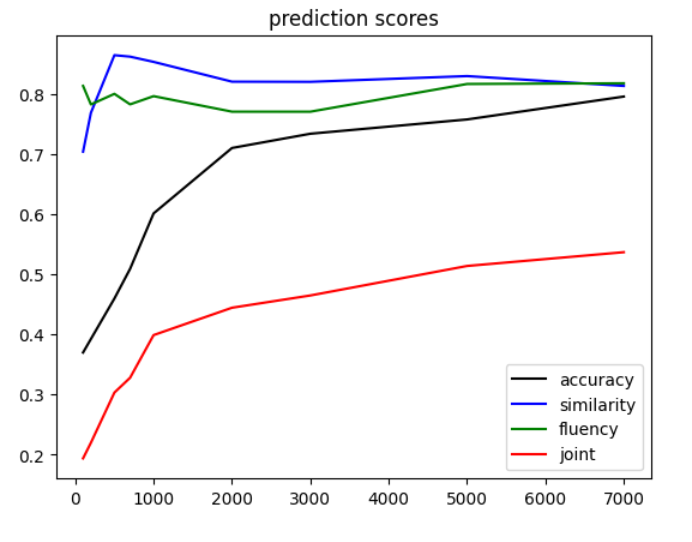

The graph shows that the Style Transfer Accuracy score (STA) and Joint score (J) have a similar pattern. Increasing the number of training steps can help to enhance the scores. While the Meaning Preservation score (SIM) can reach its peak at training step = 500, it thereafter drops to approximately 0.8 and does not vary significantly. During the first 1000 training steps, the Fluency score (FL) fluctuates. After 1000 steps, the score drops somewhat and then rises to approximately 0.80.

When comparing the ruT5-base and ruT5-base with 7000 training steps, additional steps may help to enhance the scores: Meaning Preservation score (SIM) and Fluency score (FL), which leads to an increase in Joint score (J). More training leads to a better understanding of linguistic similarity and fluency by the model.

**Level of toxicity for models**

I test the toxicity of each method, and the results are displayed in the table below. Among the models, the ruT5-base model provides the most outstanding performance.

<br>

Method                              | Level of Toxicity
---                                 | ---  
test data                           |  0.63
**ruT5-base**                      | **0.20** 
ruPromp                             | 0.33
delete                              | 0.38

<br>


I also explore with different training steps in order to estimate the level of toxicity for ruT5-base. The result is shown in the graph below. As the graph shows, increasing the training step can help to reduce the level of toxicity.

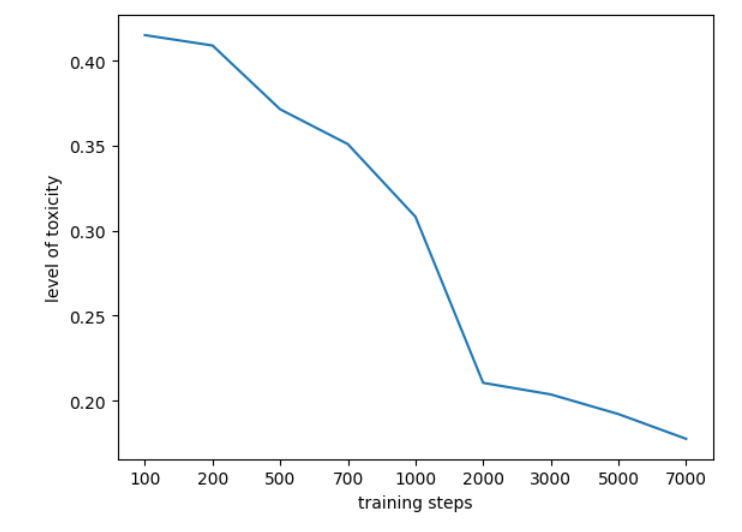

**Trying the new way!**

Following what I learnt above, I discovered that ruT5 is an excellent way for achieving the maximum STA score while also reducing the degree of toxicity. Furthermore, the delete method improves SIM and FL scores while lowering STA. So I decided to combine these two methods.

    1. Delete all toxic words
    2. Paraphrase the sentence with ruT5

<br>

Method                              | STA  | SIM  | FL   | J
---                                 | ---  | ---  | ---  | ---
delete x ruT5                       | 0.809 | 0.836 | 0.820 | 0.565


After combining the models, I was able to improve the model's performance and get my maximum score.

# 3. Code

*Enter here all code used to produce your results submitted to Codalab. Add some comments and subsections to navigate though your solution.*

*In this part you are expected to develop yourself a solution of the task and provide a reproducible code:*
- *Using Python 3;*
- *Contains code for installation of all dependencies;*
- *Contains code for downloading of all the datasets used*;
- *Contains the code for reproducing your results (in other words, if a tester downloads your notebook she should be able to run cell-by-cell the code and obtain your experimental results as described in the methodology section)*.


*As a result, you code will be graded according to these criteria:*
- ***Readability**: your code should be well-structured preferably with indicated parts of your approach (Preprocessing, Model training, Evaluation, etc.).*
- ***Reproducibility**: your code should be reproduced without any mistakes with “Run all” mode (obtaining experimental part).*


## 3.1 Requirements

In [ ]:
# ---------- connect to drive for saving important results ---------- 

# from google.colab import drive
# drive.mount('/content/drive')

!mkdir train_models
!mkdir train_results

In [ ]:
!pip install transformers sentencepiece ufal.udpipe ruprompts accelerate datasets detoxify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 937.0/937.0 kB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/evaluation/ru_detoxification_evaluation.py
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/evaluation/ru_detoxification_metrics.py
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/baselines/delete/toxic_vocab_extended.txt
!wget https://github.com/s-nlp/russe_detox_2022/blob/main/baselines/delete/udpipe_syntagrus.model

--2023-05-17 13:05:15--  https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/evaluation/ru_detoxification_evaluation.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3606 (3.5K) [text/plain]
Saving to: ‘ru_detoxification_evaluation.py’

ru_detoxification_e 100%[===================>]   3.52K  --.-KB/s    in 0s      

2023-05-17 13:05:16 (63.4 MB/s) - ‘ru_detoxification_evaluation.py’ saved [3606/3606]

--2023-05-17 13:05:16--  https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/evaluation/ru_detoxification_metrics.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.

In [ ]:
import pandas as pd
import numpy as np

from tqdm.auto import tqdm, trange

import warnings
warnings.filterwarnings("ignore")

from sklearn.utils import shuffle

from transformers import (
    BartForConditionalGeneration,
    BartTokenizer,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    T5ForConditionalGeneration,
    T5Tokenizer,
    AutoModel,
    AutoTokenizer,
    GPT2LMHeadModel, 
    GPT2Tokenizer,
    set_seed,
    TrainingArguments,
    Trainer,
    pipeline,
)

import transformers

import torch
from torch.utils.data import Dataset, DataLoader

from typing import Tuple, List, Dict, Union
import gc

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from ru_detoxification_evaluation import load_model
from ru_detoxification_metrics import evaluate_style
from ru_detoxification_metrics import evaluate_cosine_similarity
from ru_detoxification_metrics import evaluate_cola_relative
from nltk.translate.chrf_score import corpus_chrf

import gensim
from ufal.udpipe import Model, Pipeline

from ruprompts import (
    PromptFormat,
    TensorPromptProvider,
    Prompt,
    Text2TextPreprocessor,
)
from transformers.optimization import AdamW, get_linear_schedule_with_warmup
from ruprompts.callbacks import (
    FreezeTransformerUnfreezePrompt,
    ReduceCheckpoint,
    SavePretrainedPrompt,
)

from datasets import load_dataset
import matplotlib.pyplot as plt
from detoxify import Detoxify
import random

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

## 3.2 Download the data

In [ ]:
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/train.tsv
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/dev.tsv
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/test.tsv

--2023-05-17 13:05:31--  https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1902888 (1.8M) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>]   1.81M  --.-KB/s    in 0.009s  

2023-05-17 13:05:31 (204 MB/s) - ‘train.tsv’ saved [1902888/1902888]

--2023-05-17 13:05:31--  https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/dev.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200691 (196K) [text/pla

In [ ]:
# read file for train, validation and test set

train_df = pd.read_csv('train.tsv', sep="\t")
train_df = train_df.fillna('')

dev_df = pd.read_csv('dev.tsv', sep="\t")
dev_df = dev_df.fillna('')

test_df = pd.read_csv('test.tsv', sep="\t")

In [ ]:
print(f'{train_df.shape} \n')
train_df.head(3)

(6948, 5) 



,index,toxic_comment,neutral_comment1,neutral_comment2,neutral_comment3
0,0,"и,чё,блядь где этот херой был до этого со свои...","Ну и где этот герой был,со своими доказательст...",Где этот герой был до этого со своими доказате...,"и,где этот герой был до этого со своими доказа..."
1,1,"О, а есть деанон этого петуха?","О, а есть деанон",,
2,2,"херну всякую пишут,из-за этого лайка.долбоебизм.","Чушь всякую пишут, из- за этого лайка.","Ерунду всякую пишут,из-за этого лайка.",


In [ ]:
print(f'{dev_df.shape} \n')
dev_df.head(3)

(800, 4) 



,toxic_comment,neutral_comment1,neutral_comment2,neutral_comment3
0,пиздеж! температуры горения хватит чтобы её ра...,Враньё! Температуры горения хватит чтобы ее ра...,"неправда,температуры горения хватит чтобы расп...",Враньё! Температуры горения хватит на чтобы её...
1,а ты чмо там был.ты вообще служил.гандон,А ты там был? Ты вообще служил?,,
2,пиздабол ---- а сам где кормишься ?,а сам где кормишься ?,,


In [ ]:
print(f'{test_df.shape} \n')
test_df.head(3)

(875, 1) 



,toxic_comment
0,какой дебил эту придумывает
1,В такой ситуации виноваты пидарасы из Ростелек...
2,"актёр может и не плохой,но как человек - хуйло..."


## 3.3 Preprocessing 

In [ ]:
# prepare data for train set

toxic_list = []
neutral_list = []

for index, row in train_df.iterrows():
    toxic = row['toxic_comment']
    neutral = row[['neutral_comment1', 'neutral_comment2', 'neutral_comment3']].tolist()
    
    for neu_com in neutral:
        if len(neu_com) > 0:
            toxic_list.append(toxic)
            neutral_list.append(neu_com)

df = pd.DataFrame({
    'toxic_comment': toxic_list,
    'neutral_comment': neutral_list
})

df = shuffle(df)


In [ ]:
# prepare data for validation set

toxic_list_dev = []
neutral_list_dev = []

for index, row in dev_df.iterrows():
    toxic = row['toxic_comment']
    neutral = row[['neutral_comment1', 'neutral_comment2', 'neutral_comment3']].tolist()
    
    for neu_com in neutral:
        if len(neu_com) > 0:
            toxic_list_dev.append(toxic)
            neutral_list_dev.append(neu_com)

df_val = pd.DataFrame({
    'toxic_comment': toxic_list_dev,
    'neutral_comment': neutral_list_dev
})

df_val = shuffle(df_val)


## 3.4 My method of text processing

### useful functions

#### functions for training ruT5

All these functions are from the [baseline ruT5](https://github.com/s-nlp/russe_detox_2022/tree/main/baselines/t5).

In [ ]:
class PairsDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, idx):
        assert idx < len(self.x['input_ids'])
        item = {key: val[idx] for key, val in self.x.items()}
        item['decoder_attention_mask'] = self.y['attention_mask'][idx]
        item['labels'] = self.y['input_ids'][idx]
        return item
    
    @property
    def n(self):
        return len(self.x['input_ids'])

    def __len__(self):
        return self.n # * 2

In [ ]:
class DataCollatorWithPadding:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        batch = self.tokenizer.pad(
            features,
            padding=True,
        )
        ybatch = self.tokenizer.pad(
            {'input_ids': batch['labels'], 'attention_mask': batch['decoder_attention_mask']},
            padding=True,
        ) 
        batch['labels'] = ybatch['input_ids']
        batch['decoder_attention_mask'] = ybatch['attention_mask']
        
        return {k: torch.tensor(v) for k, v in batch.items()}

In [ ]:
def cleanup():
    gc.collect()
    torch.cuda.empty_cache()
    
cleanup()

In [ ]:
def evaluate_model(model, test_dataloader):
    num = 0
    den = 0

    for batch in test_dataloader:
        with torch.no_grad():
            loss = model(**{k: v.to(model.device) for k, v in batch.items()}).loss
            num += len(batch) * loss.item()
            den += len(batch)
    val_loss = num / den
    return val_loss

In [ ]:
def train_loop(
    model, train_dataloader, val_dataloader, 
    max_epochs=30, 
    max_steps=1_000, 
    lr=3e-5,
    gradient_accumulation_steps=1, 
    cleanup_step=100,
    report_step=300,
    window=100,
):
    cleanup()
    optimizer = torch.optim.Adam(params = [p for p in model.parameters() if p.requires_grad], lr=lr)

    ewm_loss = 0
    step = 0
    model.train()

    for epoch in trange(max_epochs):
        print(step, max_steps)
        if step >= max_steps:
            break
        tq = tqdm(train_dataloader)
        for i, batch in enumerate(tq):
            try:
                batch['labels'][batch['labels']==0] = -100
                loss = model(**{k: v.to(model.device) for k, v in batch.items()}).loss
                loss.backward()
            except Exception as e:
                print('error on step', i, e)
                loss = None
                cleanup()
                continue
            if i and i % gradient_accumulation_steps == 0:
                optimizer.step()
                optimizer.zero_grad()
                step += 1
                if step >= max_steps:
                    break

            if i % cleanup_step == 0:
                cleanup()

            w = 1 / min(i+1, window)
            ewm_loss = ewm_loss * (1-w) + loss.item() * w
            tq.set_description(f'loss: {ewm_loss:4.4f}')

            if (i and i % report_step == 0 or i == len(train_dataloader)-1)  and val_dataloader is not None:
                model.eval()
                eval_loss = evaluate_model(model, val_dataloader)
                model.train()
                print(f'epoch {epoch}, step {i}/{step}: train loss: {ewm_loss:4.4f}  val loss: {eval_loss:4.4f}')
                
            if step % 1000 == 0:
                model.save_pretrained(f't5_base_{steps}')
        
    cleanup()

In [ ]:
def train_model(df, df_val, model_name, test_size=0.1, batch_size=32, **kwargs):
    model = T5ForConditionalGeneration.from_pretrained(model_name).cuda()
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    train_dataset = PairsDataset(tokenizer(df['toxic_comment'].tolist()), tokenizer(df['neutral_comment'].tolist()))
    test_dataset = PairsDataset(tokenizer(df_val['toxic_comment'].tolist()), tokenizer(df_val['neutral_comment'].tolist()))
    
    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, drop_last=False, shuffle=True, collate_fn=data_collator)
    val_dataloader = DataLoader(test_dataset, batch_size=batch_size, drop_last=False, shuffle=True, collate_fn=data_collator)

    train_loop(model, train_dataloader, val_dataloader, **kwargs)
    return model

In [ ]:
def paraphrase(text, model, n=None, max_length='auto', temperature=0.0, beams=3):
    texts = [text] if isinstance(text, str) else text
    inputs = tokenizer(texts, return_tensors='pt', padding=True)['input_ids'].to(model.device)
    if max_length == 'auto':
        max_length = int(inputs.shape[1] * 1.2) + 10
    result = model.generate(
        inputs, 
        num_return_sequences=n or 1, 
        do_sample=False, 
        temperature=temperature, 
        repetition_penalty=3.0, 
        max_length=max_length,
        bad_words_ids=[[2]],  # unk
        num_beams=beams,
    )
    texts = [tokenizer.decode(r, skip_special_tokens=True) for r in result]
    if not n and isinstance(text, str):
        return texts[0]
    return texts

#### function for calculating scores

In [ ]:
# prepare calcucating score function for all methods

test_inputs = test_df['toxic_comment'].tolist()

def cal_score(preds):
    # STA
    style_model, style_tokenizer = load_model('SkolkovoInstitute/russian_toxicity_classifier', use_cuda=True);
    accuracy = evaluate_style(
        model = style_model,
        tokenizer = style_tokenizer,
        texts = preds,
        target_label=0,  # 1 is toxic, 0 is neutral
        batch_size=32, 
        verbose=True
    );

    # SIM
    meaning_model, meaning_tokenizer = load_model('cointegrated/LaBSE-en-ru', use_cuda=True, model_class=AutoModel);
    similarity = evaluate_cosine_similarity(
        model = meaning_model,
        tokenizer = meaning_tokenizer,
        original_texts = test_inputs,
        rewritten_texts = preds,
        batch_size=32,
        verbose=True,
        );

    # Fluency score (FL)
    cola_model, cola_tolenizer = load_model('SkolkovoInstitute/rubert-base-corruption-detector', use_cuda=True);
    fluency = evaluate_cola_relative(
        model = cola_model,
        tokenizer = cola_tolenizer,
        original_texts = test_inputs,
        rewritten_texts = preds,
        target_label=1,
        batch_size=32,
        verbose=True
    );

    # Joint score (J)
    joint = accuracy * similarity * fluency

    # print('Style transfer accuracy (STA): %.2f' %round(np.mean(accuracy), 2))
    # print('Meaning preservation (SIM): %.2f' %round(np.mean(similarity), 2))
    # print('Fluency score (FL): %.2f' %round(np.mean(fluency), 2))
    # print('Joint score (J):  %.2f' %round(np.mean(joint), 2))

    return  accuracy, similarity, fluency, joint

### ruT5

#### Let's start with trying to run the baseline code!

In [ ]:
# train model

model_name = 'sberbank-ai/ruT5-base'
cleanup()
datasets = {
    'train': df
}

for steps in [300, 1000, 3000, 10000]:
    for dname, d in datasets.items():
        print(f'\n\n\n  {dname}  {steps} \n=====================\n\n')
        model = train_model(df, df_val, model_name=model_name, batch_size=16, max_epochs=1000, max_steps=steps)
        
        # model.save_pretrained(f'/content/drive/MyDrive/t5_base_{dname}_{steps}')
        model.save_pretrained(f'/content/train_models/t5_base_{dname}_{steps}')




  train  300 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 300


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


300 300



  train  1000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 1000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.6834  val loss: 6.8227
epoch 0, step 600/600: train loss: 1.9715  val loss: 6.9927
epoch 0, step 693/693: train loss: 1.8628  val loss: 7.0697
693 1000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.7006  val loss: 7.1285
1000 1000



  train  3000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 3000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.6596  val loss: 7.0247
epoch 0, step 600/600: train loss: 2.0067  val loss: 7.0056
epoch 0, step 693/693: train loss: 1.9031  val loss: 6.9560
693 3000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.6830  val loss: 7.0426
epoch 1, step 600/1293: train loss: 1.6374  val loss: 6.6705
epoch 1, step 693/1386: train loss: 1.6160  val loss: 6.8541
1386 3000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.4948  val loss: 7.0656
epoch 2, step 600/1986: train loss: 1.4254  val loss: 6.8716
epoch 2, step 693/2079: train loss: 1.4542  val loss: 6.6890
2079 3000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 3, step 300/2379: train loss: 1.3155  val loss: 7.0121
epoch 3, step 600/2679: train loss: 1.2961  val loss: 6.8857
epoch 3, step 693/2772: train loss: 1.3021  val loss: 7.0818
2772 3000


  0%|          | 0/694 [00:00<?, ?it/s]

3000 3000



  train  10000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 10000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.8331  val loss: 6.9172
epoch 0, step 600/600: train loss: 2.0451  val loss: 6.9036
epoch 0, step 693/693: train loss: 1.9426  val loss: 6.7394
693 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.7360  val loss: 6.9088
epoch 1, step 600/1293: train loss: 1.6075  val loss: 7.0700
epoch 1, step 693/1386: train loss: 1.5928  val loss: 7.0034
1386 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.5136  val loss: 7.2187
epoch 2, step 600/1986: train loss: 1.4763  val loss: 7.1237
epoch 2, step 693/2079: train loss: 1.4630  val loss: 7.1828
2079 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 3, step 300/2379: train loss: 1.3480  val loss: 6.9125
epoch 3, step 600/2679: train loss: 1.3579  val loss: 7.1478
epoch 3, step 693/2772: train loss: 1.3379  val loss: 6.9205
2772 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 4, step 300/3072: train loss: 1.2579  val loss: 6.8907
epoch 4, step 600/3372: train loss: 1.2278  val loss: 6.9667
epoch 4, step 693/3465: train loss: 1.2223  val loss: 7.2169
3465 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 5, step 300/3765: train loss: 1.1226  val loss: 7.2692
epoch 5, step 600/4065: train loss: 1.1697  val loss: 7.2757
epoch 5, step 693/4158: train loss: 1.1538  val loss: 7.2578
4158 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 6, step 300/4458: train loss: 1.0724  val loss: 7.2106
epoch 6, step 600/4758: train loss: 1.0473  val loss: 7.4625
epoch 6, step 693/4851: train loss: 1.0566  val loss: 7.3421
4851 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 7, step 300/5151: train loss: 1.0168  val loss: 7.3624
epoch 7, step 600/5451: train loss: 0.9685  val loss: 7.3066
epoch 7, step 693/5544: train loss: 0.9761  val loss: 7.3734
5544 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 8, step 300/5844: train loss: 0.9442  val loss: 7.5634
epoch 8, step 600/6144: train loss: 0.9322  val loss: 7.2194
epoch 8, step 693/6237: train loss: 0.9304  val loss: 7.5420
6237 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 9, step 300/6537: train loss: 0.8743  val loss: 7.4762
epoch 9, step 600/6837: train loss: 0.8867  val loss: 7.3724
epoch 9, step 693/6930: train loss: 0.8851  val loss: 7.3051
6930 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 10, step 300/7230: train loss: 0.8137  val loss: 7.6892
epoch 10, step 600/7530: train loss: 0.8244  val loss: 7.5632
epoch 10, step 693/7623: train loss: 0.8356  val loss: 7.3843
7623 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 11, step 300/7923: train loss: 0.7793  val loss: 8.0022
epoch 11, step 600/8223: train loss: 0.7821  val loss: 7.5294
epoch 11, step 693/8316: train loss: 0.7797  val loss: 7.7593
8316 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 12, step 300/8616: train loss: 0.7328  val loss: 7.7404
epoch 12, step 600/8916: train loss: 0.7297  val loss: 7.8240
epoch 12, step 693/9009: train loss: 0.7318  val loss: 7.4122
9009 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 13, step 300/9309: train loss: 0.6972  val loss: 7.5448
epoch 13, step 600/9609: train loss: 0.6883  val loss: 7.6988
epoch 13, step 693/9702: train loss: 0.6755  val loss: 7.8077
9702 10000


  0%|          | 0/694 [00:00<?, ?it/s]

10000 10000


In [ ]:
# predict the result
cleanup()

base_model_name = 'sberbank-ai/ruT5-base'
model_name = 'SkolkovoInstitute/ruT5-base-detox'

tokenizer = AutoTokenizer.from_pretrained(base_model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.cuda();

toxic_inputs = test_df['toxic_comment'].tolist()
para_results = []
problematic_batch = [] 
batch_size = 8

for i in tqdm(range(0, len(toxic_inputs), batch_size)):
    batch = [sentence for sentence in toxic_inputs[i:i + batch_size]]
    try:
        para_results.extend(paraphrase(batch, model, temperature=0.0))
    except Exception as e:
        print(i)
        para_results.append(toxic_inputs[i:i + batch_size])

# with open(f"/content/drive/MyDrive/train_results/predictions_7.txt", "w") as f:
with open(f"/content/train_results/predictions_7.txt", "w") as f:
    f.write("\n".join(para_results))

  0%|          | 0/110 [00:00<?, ?it/s]

In [ ]:
# with open('/content/drive/MyDrive/train_results/predictions_7.txt', 'r') as file:
with open('/content/train_results/predictions_7.txt', 'r') as file:
    preds = file.readlines()
    
preds = [sentence.strip() for sentence in preds]
# cal_score(preds)

accuracy, similarity, fluency, joint = cal_score(preds)
print('Style transfer accuracy (STA): %.3f' %round(np.mean(accuracy), 3))
print('Meaning preservation (SIM): %.3f' %round(np.mean(similarity), 3))
print('Fluency score (FL): %.3f' %round(np.mean(fluency), 3))
print('Joint score (J):  %.3f' %round(np.mean(joint), 3))

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Style transfer accuracy (STA): 0.796
Meaning preservation (SIM): 0.827
Fluency score (FL): 0.837
Joint score (J):  0.560


#### train model with different step size 

In [ ]:
# train model with different step size 

model_name = 'sberbank-ai/ruT5-base'
cleanup()
datasets = {'train': df}

for steps in [100, 200 , 500, 700, 1000, 2000, 3000, 5000, 7000]: # , 10000]:   # -- have to stop after 7000 steps since the GPU limit
    print(f'\n\n\n {steps} \n=====================\n\n')
    model = train_model(df, df_val, model_name=model_name, batch_size=16, max_epochs=1000, max_steps=steps)

    # model.save_pretrained(f'/content/drive/MyDrive/train_models/t5_base_train_{steps}')
    model.save_pretrained(f'/content/train_models/t5_base_train_{steps}')




 100 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 100


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


100 100



 200 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 200


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


200 200



 500 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 500


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.8404  val loss: 6.7234
500 500



 700 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 700


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 3.1194  val loss: 6.6429
epoch 0, step 600/600: train loss: 2.1101  val loss: 7.0204
epoch 0, step 693/693: train loss: 2.0513  val loss: 7.0508
693 700


  0%|          | 0/694 [00:00<?, ?it/s]

700 700



 1000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 1000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.6910  val loss: 6.6978
epoch 0, step 600/600: train loss: 1.9559  val loss: 7.0837
epoch 0, step 693/693: train loss: 1.9169  val loss: 6.8321
693 1000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.6973  val loss: 6.9790
1000 1000



 2000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 2000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.7603  val loss: 6.6632
epoch 0, step 600/600: train loss: 2.0336  val loss: 7.0193
epoch 0, step 693/693: train loss: 1.9646  val loss: 6.8336
693 2000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.7117  val loss: 6.8543
epoch 1, step 600/1293: train loss: 1.6418  val loss: 6.8474
epoch 1, step 693/1386: train loss: 1.6016  val loss: 7.0673
1386 2000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.5012  val loss: 7.0083
epoch 2, step 600/1986: train loss: 1.4373  val loss: 6.8719
2000 2000



 3000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 3000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.6301  val loss: 7.0064
epoch 0, step 600/600: train loss: 1.9471  val loss: 7.0392
epoch 0, step 693/693: train loss: 1.8869  val loss: 6.8279
693 3000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.6948  val loss: 7.0765
epoch 1, step 600/1293: train loss: 1.6134  val loss: 7.1427
epoch 1, step 693/1386: train loss: 1.5544  val loss: 6.8269
1386 3000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.4446  val loss: 7.0349
epoch 2, step 600/1986: train loss: 1.4492  val loss: 7.1568
epoch 2, step 693/2079: train loss: 1.4545  val loss: 7.0326
2079 3000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 3, step 300/2379: train loss: 1.3146  val loss: 7.2315
epoch 3, step 600/2679: train loss: 1.3279  val loss: 6.7971
epoch 3, step 693/2772: train loss: 1.3310  val loss: 6.9261
2772 3000


  0%|          | 0/694 [00:00<?, ?it/s]

3000 3000



 5000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 5000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.9349  val loss: 6.7571
epoch 0, step 600/600: train loss: 2.1205  val loss: 7.0833
epoch 0, step 693/693: train loss: 2.0138  val loss: 6.9773
693 5000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.8027  val loss: 6.9358
epoch 1, step 600/1293: train loss: 1.7252  val loss: 6.9956
epoch 1, step 693/1386: train loss: 1.6634  val loss: 6.7964
1386 5000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.5414  val loss: 6.9952
epoch 2, step 600/1986: train loss: 1.5034  val loss: 6.7730
epoch 2, step 693/2079: train loss: 1.5310  val loss: 6.8673
2079 5000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 3, step 300/2379: train loss: 1.3852  val loss: 6.7060
epoch 3, step 600/2679: train loss: 1.3717  val loss: 6.7263
epoch 3, step 693/2772: train loss: 1.3621  val loss: 6.6506
2772 5000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 4, step 300/3072: train loss: 1.2824  val loss: 6.6909
epoch 4, step 600/3372: train loss: 1.2877  val loss: 6.7525
epoch 4, step 693/3465: train loss: 1.2949  val loss: 6.7415
3465 5000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 5, step 300/3765: train loss: 1.1986  val loss: 6.7780
epoch 5, step 600/4065: train loss: 1.2111  val loss: 6.8636
epoch 5, step 693/4158: train loss: 1.1742  val loss: 7.0895
4158 5000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 6, step 300/4458: train loss: 1.1178  val loss: 7.1064
epoch 6, step 600/4758: train loss: 1.1215  val loss: 6.9064
epoch 6, step 693/4851: train loss: 1.1135  val loss: 6.9728
4851 5000


  0%|          | 0/694 [00:00<?, ?it/s]

5000 5000



 7000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 7000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.9253  val loss: 6.7386
epoch 0, step 600/600: train loss: 2.1309  val loss: 6.9933
epoch 0, step 693/693: train loss: 2.0155  val loss: 6.9000
693 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.8043  val loss: 6.9558
epoch 1, step 600/1293: train loss: 1.6775  val loss: 6.7691
epoch 1, step 693/1386: train loss: 1.6426  val loss: 6.8942
1386 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.5379  val loss: 6.8866
epoch 2, step 600/1986: train loss: 1.4777  val loss: 6.9742
epoch 2, step 693/2079: train loss: 1.4843  val loss: 6.8992
2079 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 3, step 300/2379: train loss: 1.3939  val loss: 6.9462
epoch 3, step 600/2679: train loss: 1.3624  val loss: 6.9751
epoch 3, step 693/2772: train loss: 1.3395  val loss: 7.0061
2772 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 4, step 300/3072: train loss: 1.2704  val loss: 6.9793
epoch 4, step 600/3372: train loss: 1.2572  val loss: 7.1290
epoch 4, step 693/3465: train loss: 1.2660  val loss: 7.0049
3465 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 5, step 300/3765: train loss: 1.2138  val loss: 7.0808
epoch 5, step 600/4065: train loss: 1.1710  val loss: 7.1309
epoch 5, step 693/4158: train loss: 1.1621  val loss: 7.3323
4158 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 6, step 300/4458: train loss: 1.1063  val loss: 7.2513
epoch 6, step 600/4758: train loss: 1.1094  val loss: 6.8400
epoch 6, step 693/4851: train loss: 1.0904  val loss: 7.0385
4851 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 7, step 300/5151: train loss: 1.0441  val loss: 7.0336
epoch 7, step 600/5451: train loss: 1.0123  val loss: 7.0753
epoch 7, step 693/5544: train loss: 1.0464  val loss: 7.1707
5544 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 8, step 300/5844: train loss: 0.9598  val loss: 7.1345
epoch 8, step 600/6144: train loss: 0.9667  val loss: 7.2221
epoch 8, step 693/6237: train loss: 0.9705  val loss: 7.2733
6237 7000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 9, step 300/6537: train loss: 0.9036  val loss: 7.5249
epoch 9, step 600/6837: train loss: 0.9102  val loss: 7.7149
epoch 9, step 693/6930: train loss: 0.9016  val loss: 7.1775
6930 7000


  0%|          | 0/694 [00:00<?, ?it/s]

7000 7000



 10000 




  0%|          | 0/1000 [00:00<?, ?it/s]

0 10000


  0%|          | 0/694 [00:00<?, ?it/s]

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


epoch 0, step 300/300: train loss: 2.7153  val loss: 6.9065
epoch 0, step 600/600: train loss: 1.9771  val loss: 7.0388
epoch 0, step 693/693: train loss: 1.8946  val loss: 7.1324
693 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 1, step 300/993: train loss: 1.6879  val loss: 7.1968
epoch 1, step 600/1293: train loss: 1.6334  val loss: 6.8940
epoch 1, step 693/1386: train loss: 1.6164  val loss: 6.8852
1386 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 2, step 300/1686: train loss: 1.4772  val loss: 7.0537
epoch 2, step 600/1986: train loss: 1.4569  val loss: 7.0079
epoch 2, step 693/2079: train loss: 1.4200  val loss: 6.9862
2079 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 3, step 300/2379: train loss: 1.3290  val loss: 6.9776
epoch 3, step 600/2679: train loss: 1.3178  val loss: 7.2259
epoch 3, step 693/2772: train loss: 1.3387  val loss: 6.9300
2772 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 4, step 300/3072: train loss: 1.2437  val loss: 7.0703
epoch 4, step 600/3372: train loss: 1.2256  val loss: 7.0768
epoch 4, step 693/3465: train loss: 1.2139  val loss: 7.2304
3465 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 5, step 300/3765: train loss: 1.1362  val loss: 7.1952
epoch 5, step 600/4065: train loss: 1.1417  val loss: 7.0710
epoch 5, step 693/4158: train loss: 1.1368  val loss: 7.1784
4158 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 6, step 300/4458: train loss: 1.0385  val loss: 7.4412
epoch 6, step 600/4758: train loss: 1.0582  val loss: 7.2042
epoch 6, step 693/4851: train loss: 1.0742  val loss: 7.2284
4851 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 7, step 300/5151: train loss: 0.9923  val loss: 7.2959
epoch 7, step 600/5451: train loss: 0.9844  val loss: 7.1858
epoch 7, step 693/5544: train loss: 1.0074  val loss: 7.4960
5544 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 8, step 300/5844: train loss: 0.9138  val loss: 7.0506
epoch 8, step 600/6144: train loss: 0.9123  val loss: 7.2235
epoch 8, step 693/6237: train loss: 0.9255  val loss: 7.1415
6237 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 9, step 300/6537: train loss: 0.8630  val loss: 7.5781
epoch 9, step 600/6837: train loss: 0.8743  val loss: 7.4290
epoch 9, step 693/6930: train loss: 0.8771  val loss: 7.1998
6930 10000


  0%|          | 0/694 [00:00<?, ?it/s]

epoch 10, step 300/7230: train loss: 0.8065  val loss: 7.3470


#### predict the results for different steps

In [ ]:
# ---------- predict the result ----------

for steps in [100, 200 , 500, 700, 1000, 2000, 3000, 5000, 7000]:  

    # use tokenizer from sberbank-ai/ruT5-base
    tokenizer = AutoTokenizer.from_pretrained('sberbank-ai/ruT5-base')

    # use the model from pretrained
    # model_name = f'/content/drive/MyDrive/train_models/t5_base_train_{steps}'
    model_name = f'/content/train_models/t5_base_train_{steps}'
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    model.cuda();

    # predict result
    toxic_inputs = test_df['toxic_comment'].tolist()
    para_results = []
    problematic_batch = [] 
    batch_size = 8

    for i in tqdm(range(0, len(toxic_inputs), batch_size)):
        batch = [sentence for sentence in toxic_inputs[i:i + batch_size]]
        try:
            para_results.extend(paraphrase(batch, model, temperature=0.0))
        except Exception as e:
            print(i)
            para_results.append(toxic_inputs[i:i + batch_size])

    # save file
    # with open(f'/content/drive/MyDrive/train_results/prediction_ruT5_{steps}.txt', "w") as f:
    with open(f'/content/train_results/prediction_ruT5_{steps}.txt', "w") as f:
        f.write("\n".join(para_results))

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

#### calculate scores for each model

In [ ]:
# ---------- calculate the scores ----------

score_acc = []
score_sim = []
score_flu = []
score_joi = []

for steps in [100, 200 , 500, 700, 1000, 2000, 3000, 5000, 7000]:

    # with open(f'/content/drive/MyDrive/train_results/prediction_ruT5_{steps}.txt', 'r') as file:
    with open(f'/content/train_results/prediction_ruT5_{steps}.txt', 'r') as file:
        preds = file.readlines()

    preds = [sentence.strip() for sentence in preds]
    accuracy, similarity, fluency, joint = cal_score(preds)

    score_acc.append(accuracy)
    score_sim.append(similarity)
    score_flu.append(fluency)
    score_joi.append(joint)

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

#### plot the graph to see the results

In [ ]:
steps = [100, 200 , 500, 700, 1000, 2000, 3000, 5000, 7000]
mean_acc = []
mean_sim = []
mean_flu = []
mean_joi = []

for i in range(len(steps)):
    mean_acc.append(np.mean(score_acc[i]))
    mean_sim.append(np.mean(score_sim[i]))
    mean_flu.append(np.mean(score_flu[i]))
    mean_joi.append(np.mean(score_joi[i]))

print(f'SCORES: STA, SIM, FL, J')
for i in range(len(mean_acc)):
    print(f'{round(mean_acc[i], 3), round(mean_sim[i], 3), round(mean_flu[i], 3), round(mean_joi[i], 3)}')

SCORES: STA, SIM, FL, J
(0.37, 0.704, 0.813, 0.194)
(0.392, 0.768, 0.782, 0.22)
(0.46, 0.864, 0.8, 0.303)
(0.509, 0.862, 0.782, 0.328)
(0.601, 0.853, 0.796, 0.399)
(0.71, 0.82, 0.77, 0.444)
(0.734, 0.82, 0.77, 0.465)
(0.757, 0.829, 0.816, 0.514)
(0.795, 0.813, 0.817, 0.537)


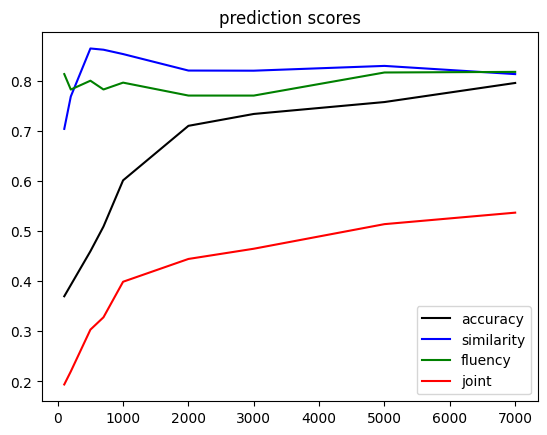

In [ ]:
plt.plot(steps, mean_acc, 'k', label='accuracy')
plt.plot(steps, mean_sim, 'b', label='similarity')
plt.plot(steps, mean_flu, 'g', label='fluency')
plt.plot(steps, mean_joi, 'r', label='joint')

plt.legend()
plt.title('prediction scores');

### ruPromp

train 10000 steps

In [ ]:
# prepare data
df.to_csv("train_prep.tsv", index=False, sep="\t")
df_val.to_csv("dev_prep.tsv", index=False, sep="\t")

datasets = load_dataset("csv", data_files={"train": "train_prep.tsv", "validation": "dev_prep.tsv"}, sep="\t")
train_dataset = datasets["train"]
valid_dataset = datasets["validation"]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b49847706110f0f9/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# load model and tokenizer
backbone_id = "sberbank-ai/rugpt3large_based_on_gpt2"
model = GPT2LMHeadModel.from_pretrained(backbone_id)
tokenizer = AutoTokenizer.from_pretrained(backbone_id, pad_token="<pad>", eos_token="<pad>")

# set prompt format
prompt_format = PromptFormat("<P*100>{toxic_comment}<P*20>")

# set prompt provider
set_seed(1)
prompt_provider = TensorPromptProvider()

# set prompt object and apply to model and tokenizer
prompt = Prompt(prompt_format, prompt_provider)
prompt.patch(model, tokenizer)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# preprocess data
preprocessor = Text2TextPreprocessor(
    prompt_format=prompt_format,
    tokenizer=tokenizer,
    target_field="neutral_comment",
    max_tokens=1792,
    truncation_field="toxic_comment",
)

train_dataset = train_dataset.map(preprocessor)
valid_dataset = valid_dataset.map(preprocessor)

Map:   0%|          | 0/11090 [00:00<?, ? examples/s]

Map:   0%|          | 0/1116 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir=".",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=1,
    eval_steps=1000,
    save_steps=1000,
    logging_steps=100,
    evaluation_strategy="steps",
    save_strategy="steps",
    logging_strategy="steps",
    save_total_limit=2,
    metric_for_best_model="eval_loss",
    learning_rate=0.1,
    max_steps=10000,            # set max_steps=10000 due to the limit RAM
    report_to="tensorboard",
    logging_dir="logs",
    seed=1,
)

In [ ]:
optimizer = AdamW(prompt_provider.parameters(), lr=training_args.learning_rate)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=2000,
    num_training_steps=training_args.max_steps,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=preprocessor.collate_fn(),
    optimizers=(optimizer, scheduler),
    callbacks=[FreezeTransformerUnfreezePrompt(), ReduceCheckpoint(), SavePretrainedPrompt(prompt)],
)

In [ ]:
trainer.train()

You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss
1000,2.183900,1.901909
2000,1.811500,1.733523
3000,1.567500,1.666823


Step,Training Loss,Validation Loss
1000,2.183900,1.901909
2000,1.811500,1.733523
3000,1.567500,1.666823
4000,1.622600,1.618170
5000,1.483100,1.571642
6000,1.450600,1.597301
7000,1.392700,1.565868
8000,1.353200,1.453739
9000,1.258600,1.439154
10000,1.440100,1.431237


TrainOutput(global_step=10000, training_loss=1.6479161979675292, metrics={'train_runtime': 4462.5045, 'train_samples_per_second': 4.482, 'train_steps_per_second': 2.241, 'total_flos': 1.3332800470155264e+16, 'train_loss': 1.6479161979675292, 'epoch': 1.8})

In [ ]:
# load prompt from the last checkpoint
prompt = Prompt.from_pretrained(f"./checkpoint-{training_args.max_steps}")
ppln = pipeline("text2text-generation-with-prompt", prompt=prompt, model=model, tokenizer=tokenizer, device=0)

In [ ]:
transformers.logging.set_verbosity_error()
beam_count = 10
predictions = []
    
for i in tqdm(test_df['toxic_comment'].tolist()):
    options = ppln(
        {"toxic_comment": i},
        do_sample=False,
        num_beams=beam_count,
        num_return_sequences=beam_count,
    )

    options = [i["generated_text"].replace("<pad>", "") for i in options]
    answer = sorted(options, key=len)[-1]  # get longest answer
    predictions.append(answer)

# with open("/content/drive/MyDrive/train_results/submit.txt", "w") as f:
with open("/content/train_results/submit.txt", "w") as f:
    f.writelines(list(map(lambda x: x.replace("\n", " ") + "\n", predictions)))

  0%|          | 0/875 [00:00<?, ?it/s]

In [ ]:
# with open('/content/drive/MyDrive/train_results/submit.txt', 'r') as file:
with open('/content/train_results/submit.txt', 'r') as file:
    preds = file.readlines()
preds = [sentence.strip() for sentence in preds]

accuracy, similarity, fluency, joint = cal_score(preds)
print('Style transfer accuracy (STA): %.3f' %round(np.mean(accuracy), 3))
print('Meaning preservation (SIM): %.3f' %round(np.mean(similarity), 3))
print('Fluency score (FL): %.3f' %round(np.mean(fluency), 3))
print('Joint score (J):  %.3f' %round(np.mean(joint), 3))

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Style transfer accuracy (STA): 0.626
Meaning preservation (SIM): 0.820
Fluency score (FL): 0.788
Joint score (J):  0.388


### delete

only delete toxic words, no paraphrase 

In [ ]:
toxic_inputs = test_df['toxic_comment'].tolist()

In [ ]:
# read the toxic word file
with open('toxic_vocab_extended.txt', 'r') as file:
    toxic_words = file.readlines()
toxic_words = [sentence.strip() for sentence in toxic_words]

In [ ]:
def delete_bad_word(text):
    results = []
    content = [l for l in text.split('\n') if not l.startswith('#')][0]
    tokens = content.split()
    cleaned_sentence = [word for word in tokens if word not in toxic_words]
    results.append(' '.join(cleaned_sentence)) 
    return results

In [ ]:
preds_del = []

for text in tqdm(toxic_inputs): 
    preds_del.extend(delete_bad_word(text))

  0%|          | 0/875 [00:00<?, ?it/s]

In [ ]:
len(preds_del), len(toxic_inputs)

(875, 875)

In [ ]:
# with open('/content/drive/MyDrive/train_results/predictions_delete.txt', 'w') as f:
with open('/content/train_results/predictions_delete.txt', 'w') as f:
    f.write('\n'.join(preds_del))

In [ ]:
# with open('/content/drive/MyDrive/train_results/predictions_delete.txt', 'r') as file:
with open('/content/train_results/predictions_delete.txt', 'r') as file:
    preds = file.readlines()
preds = [sentence.strip() for sentence in preds]
accuracy, similarity, fluency, joint = cal_score(preds)

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
print('Style transfer accuracy (STA): %.3f' %round(np.mean(accuracy), 3))
print('Meaning preservation (SIM): %.3f' %round(np.mean(similarity), 3))
print('Fluency score (FL): %.3f' %round(np.mean(fluency), 3))
print('Joint score (J):  %.3f' %round(np.mean(joint), 3))

Style transfer accuracy (STA): 0.475
Meaning preservation (SIM): 0.965
Fluency score (FL): 0.929
Joint score (J):  0.400


### test the toxicity of models by Detoxify

use the [detoxify model](https://pypi.org/project/detoxify/) to see the level of toxicity

In [ ]:
# test input
preds_test = test_df['toxic_comment'].tolist()

In [ ]:
# results for ruT5-base 
# with open(f'/content/drive/MyDrive/train_results/predictions_7.txt', 'r') as file:
with open(f'/content/train_results/predictions_7.txt', 'r') as file:
        preds = file.readlines()
preds_base = [sentence.strip() for sentence in preds]

In [ ]:
# result for delete method
# with open(f'/content/drive/MyDrive/train_results/submit.txt', 'r') as file:
with open(f'/content/train_results/submit.txt', 'r') as file:
        preds = file.readlines()
preds_promp = [sentence.strip() for sentence in preds]

In [ ]:
# result for delete method
# with open(f'/content/drive/MyDrive/train_results/predictions_delete.txt', 'r') as file:
with open(f'/content/train_results/predictions_delete.txt', 'r') as file:
        preds = file.readlines()
preds_del = [sentence.strip() for sentence in preds]

In [ ]:
# results for ruT5-base with different step size
preds_T5_steps = {}
step_size = [100, 200 , 500, 700, 1000, 2000, 3000, 5000, 7000]

for steps in tqdm(step_size):

    cleanup()

    # with open(f'/content/drive/MyDrive/train_results/prediction_ruT5_{steps}.txt', 'r') as file:
    with open(f'/content/train_results/prediction_ruT5_{steps}.txt', 'r') as file:
        preds = file.readlines()

    preds = [sentence.strip() for sentence in preds]
    preds_T5_steps[steps] = preds

  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
# since it require a lot of RAM for running all so, I sample some data to test the toxicity
cleanup()

samples = random.sample(range(len(preds_test)), len(preds_test) // 5)
samples.sort()

In [ ]:
preds_samp_test = [preds_test[i] for i in samples]
preds_samp_base = [preds_base[i] for i in samples]
preds_samp_promp = [preds_promp[i] for i in samples]
preds_samp_del = [preds_del[i] for i in samples]

preds_step_100 = [preds_T5_steps[100][i] for i in samples]
preds_step_200 = [preds_T5_steps[200][i] for i in samples]
preds_step_500 = [preds_T5_steps[500][i] for i in samples]
preds_step_700 = [preds_T5_steps[700][i] for i in samples]

preds_step_1000 = [preds_T5_steps[1000][i] for i in samples]
preds_step_2000 = [preds_T5_steps[2000][i] for i in samples]
preds_step_3000 = [preds_T5_steps[3000][i] for i in samples]
preds_step_5000 = [preds_T5_steps[5000][i] for i in samples]
preds_step_7000 = [preds_T5_steps[7000][i] for i in samples]

In [ ]:
results_test = Detoxify('multilingual').predict(preds_samp_test)
results_base = Detoxify('multilingual').predict(preds_samp_base)
results_promp = Detoxify('multilingual').predict(preds_samp_promp)
results_del = Detoxify('multilingual').predict(preds_samp_del)

results_100 = Detoxify('multilingual').predict(preds_step_100)
results_200 = Detoxify('multilingual').predict(preds_step_200)
results_500 = Detoxify('multilingual').predict(preds_step_500)
results_700 = Detoxify('multilingual').predict(preds_step_700)

results_1000 = Detoxify('multilingual').predict(preds_step_1000)
results_2000 = Detoxify('multilingual').predict(preds_step_2000)
results_3000 = Detoxify('multilingual').predict(preds_step_3000)
results_5000 = Detoxify('multilingual').predict(preds_step_5000)
results_7000 = Detoxify('multilingual').predict(preds_step_7000)

In [ ]:
list_mod = ['test data', 'ruT5-base', 'ruPromp', 'delete',
            'ruT5-base with 100 training steps',
            'ruT5-base with 200 training steps',
            'ruT5-base with 500 training steps',
            'ruT5-base with 700 training steps',
            'ruT5-base with 1000 training steps',
            'ruT5-base with 2000 training steps',
            'ruT5-base with 3000 training steps',
            'ruT5-base with 5000 training steps',
            'ruT5-base with 7000 training steps']

list_toxicity = [         
    results_test['toxicity'],
    results_base['toxicity'],
    results_promp['toxicity'],
    results_del['toxicity'],

    results_100['toxicity'],
    results_200['toxicity'],
    results_500['toxicity'],
    results_700['toxicity'],

    results_1000['toxicity'],
    results_2000['toxicity'],
    results_3000['toxicity'],
    results_5000['toxicity'],
    results_7000['toxicity']
]

level_toxic = []
for i in range(len(list_mod)):
    toxic = np.mean(list_toxicity[i])
    level_toxic.append(toxic)
    print(f'{list_mod[i]} : {toxic}')

test data : 0.6295486378044423
ruT5-base : 0.1982497395059493
ruPromp : 0.33100328579411975
delete : 0.38137843052191395
ruT5-base with 100 training steps : 0.4151103927787127
ruT5-base with 200 training steps : 0.40901467854955365
ruT5-base with 500 training steps : 0.37145721784493485
ruT5-base with 700 training steps : 0.3509878826134705
ruT5-base with 1000 training steps : 0.3082281167579016
ruT5-base with 2000 training steps : 0.21051903654621648
ruT5-base with 3000 training steps : 0.20370123471166673
ruT5-base with 5000 training steps : 0.19213579868199304
ruT5-base with 7000 training steps : 0.17757576666572797


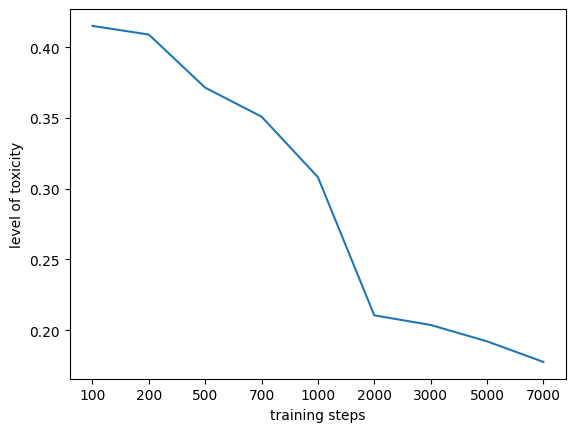

In [ ]:
# plot toxic level for each training step with ruT5-base
y = level_toxic[4:]
x = [100, 200, 500, 700, 1000, 2000, 3000, 5000, 7000]
xi = list(range(len(x)))
plt.plot(xi, y)
plt.xticks(xi, x)
plt.xlabel('training steps')
plt.ylabel('level of toxicity')
plt.show()

### detele x ruT5

After I learned from the above, I found that ruT5 is a good method that can reach to the highest score for STA and also delete method is good for SIM and FL. So, I decide to combine these 2 methods together.

1. delete all toxic words -- get the result from the above step
2. then paraphrase the sentence -- paraphrase with ruT5

In [ ]:
# use the result from deleting toxic word method and paraphrase with ruT5

# with open('/content/drive/MyDrive/train_results/predictions_delete.txt', 'r') as file:
with open('/content/train_results/predictions_delete.txt', 'r') as file:
    preds = file.readlines()

res_del = [sentence.strip() for sentence in preds]

In [ ]:
# predict the result

base_model_name = 'sberbank-ai/ruT5-base'
model_name = 'SkolkovoInstitute/ruT5-base-detox'

tokenizer = AutoTokenizer.from_pretrained(base_model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)
model.cuda();

para_results = []
problematic_batch = [] 
batch_size = 8

for i in tqdm(range(0, len(res_del), batch_size)):
    batch = [sentence for sentence in res_del[i:i + batch_size]]
    try:
        para_results.extend(paraphrase(batch, model, temperature=0.0))
    except Exception as e:
        print(i)
        para_results.append(res_del[i:i + batch_size])

# with open(f"/content/drive/MyDrive/train_results/predictions_delxruT5.txt", "w") as f:
with open(f"/content/train_results/predictions_delxruT5.txt", "w") as f:
    f.write("\n".join(para_results))

  0%|          | 0/110 [00:00<?, ?it/s]

In [ ]:
# with open('/content/drive/MyDrive/train_results/predictions_delxruT5.txt', 'r') as file:
with open('/content/train_results/predictions_delxruT5.txt', 'r') as file:
    preds = file.readlines()
preds = [sentence.strip() for sentence in preds]

accuracy, similarity, fluency, joint = cal_score(preds)

  0%|          | 0/28 [00:00<?, ?it/s]

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

In [ ]:
print(np.mean(accuracy), np.mean(similarity), np.mean(fluency), np.mean(joint))

0.80915976 0.83610266 0.8202449 0.5649127


In [ ]:
# This method can achieve to my highest score in the post-evaluation board.